In [467]:
import numpy as np
import pandas as pd

In [468]:
# cheat_data = pd.concat([pd.read_csv('cheat_dummy_data.csv')]) 
# ncheat_data = pd.concat([pd.read_csv('non_cheat_svm.csv')])

In [681]:
class0 = pd.read_csv('class0.csv').assign(result=[0]*class0.shape[0])
class1 = pd.read_csv('class1.csv').assign(result=[1]*class1.shape[0])
class2 = pd.read_csv('class2.csv').assign(result=[2]*class2.shape[0])
class3 = pd.read_csv('class3.csv').assign(result=[3]*class3.shape[0])
class4 = pd.read_csv('class4.csv').assign(result=[4]*class4.shape[0])
class5 = pd.read_csv('class5.csv').assign(result=[5]*class5.shape[0])
class6 = pd.read_csv('class6.csv').assign(result=[6]*class6.shape[0])
class7 = pd.read_csv('class7.csv').assign(result=[7]*class7.shape[0])

In [682]:
df = pd.concat([class0,class1,class2,class3,class4,class5,class6,class7])

In [683]:
df.shape

(17779, 8)

In [684]:
df.describe()

,Unnamed: 0,no_faces,Angle1,Angle2,cnt_inner,cnt_outer,Phone_detected,result
count,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000
mean,1382.765341,1.255920,9.411272,-10.234096,0.971089,0.730918,3.419245,3.477248
std,1017.107837,1.170895,21.490111,18.003446,1.861789,1.255043,12.899426,2.651544
min,0.000000,0.000000,-89.000000,-67.000000,0.000000,0.000000,0.000000,0.000000
25%,570.000000,1.000000,0.000000,-23.000000,0.000000,0.000000,0.000000,1.000000
50%,1165.000000,1.000000,9.000000,-11.000000,0.000000,0.000000,0.000000,4.000000
75%,2008.500000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,6.000000
max,4337.000000,5.000000,90.000000,54.000000,5.000000,3.000000,82.751322,7.000000


In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17779 entries, 0 to 2999
Data columns (total 15 columns):
Unnamed: 0        17779 non-null int64
no_faces          17779 non-null int64
Angle1            17779 non-null int64
Angle2            17779 non-null int64
cnt_inner         17779 non-null int64
cnt_outer         17779 non-null int64
Phone_detected    17779 non-null float64
result_class0     17779 non-null uint8
result_class1     17779 non-null uint8
result_class2     17779 non-null uint8
result_class3     17779 non-null uint8
result_class4     17779 non-null uint8
result_class5     17779 non-null uint8
result_class6     17779 non-null uint8
result_class7     17779 non-null uint8
dtypes: float64(1), int64(6), uint8(8)
memory usage: 1.2 MB


In [685]:
df.head()

,Unnamed: 0,no_faces,Angle1,Angle2,cnt_inner,cnt_outer,Phone_detected,result
0,0,1,11,-23,0,0,0.0,0
1,1,1,2,-19,0,0,0.0,0
2,2,1,13,-23,0,0,0.0,0
3,3,1,12,-23,0,0,0.0,0
4,4,1,13,-19,0,0,0.0,0


In [686]:
del df['Unnamed: 0']

In [638]:
del ncheat_data['Unnamed: 0']

In [475]:
# cheat_data = cheat_data.replace(['Head up', 'Head down', 'Head left', 'Head right', 'Mouth open'], [1,-1,-1,1,1])
# ncheat_data = ncheat_data.replace(['Head up', 'Head down', 'Head left', 'Head right', 'Mouth open'], [1,-1,-1,1,1])

In [476]:
# cheat_data.loc[:,:cheat_data.columns[3]] = cheat_data.loc[:,:cheat_data.columns[3]].replace(' ',0) #replace space strings with 0 in colomns till phone detection
# ncheat_data.loc[:,:ncheat_data.columns[3]] = ncheat_data.loc[:,:ncheat_data.columns[3]].replace(' ',0)

In [639]:
cheat_data[cheat_data.columns[3]] = cheat_data[cheat_data.columns[3]].astype('float64')
ncheat_data[ncheat_data.columns[3]] = ncheat_data[ncheat_data.columns[3]].astype('float64')

In [560]:
df.describe()

,no_faces,Angle1,Angle2,cnt_inner,cnt_outer,Phone_detected,result_class0,result_class1,result_class2,result_class3,result_class4,result_class5,result_class6,result_class7
count,5.0,5.000000,5.00000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,1.0,10.200000,-21.40000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,4.658326,2.19089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,2.000000,-23.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,11.000000,-23.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,12.000000,-23.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,13.000000,-19.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,13.000000,-19.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [479]:
ncheat_data.describe()

,no_faces,Angle1,Angle2,cnt_inner,cnt_outer,Phone_detected
count,1768.0,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000
mean,1.0,10.101244,-31.500566,0.593326,0.124434,0.135124
std,0.0,3.405352,4.381109,1.272361,0.514985,2.545270
min,1.0,-48.000000,-39.000000,0.000000,0.000000,0.000000
25%,1.0,9.000000,-33.000000,0.000000,0.000000,0.000000
50%,1.0,10.000000,-32.000000,0.000000,0.000000,0.000000
75%,1.0,11.000000,-30.000000,0.000000,0.000000,0.000000
max,1.0,40.000000,35.000000,5.000000,3.000000,54.916114


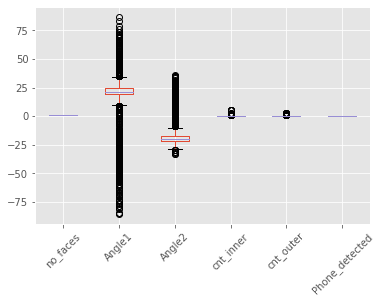

In [641]:
b1 = cheat_data.boxplot(rot=45)

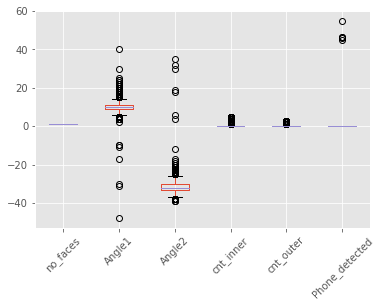

In [481]:
b2 = ncheat_data.boxplot(rot=45)

In [687]:
df.cov()

,no_faces,Angle1,Angle2,cnt_inner,cnt_outer,Phone_detected,result
no_faces,1.370996,-2.408667,2.619256,-0.248535,-0.187067,-0.875102,1.055266
Angle1,-2.408667,461.824884,-195.782894,-2.661638,-1.599419,-1.672621,-21.561967
Angle2,2.619256,-195.782894,324.124069,-7.446244,-5.505002,-4.236726,17.213033
cnt_inner,-0.248535,-2.661638,-7.446244,3.466258,2.049763,3.550811,-0.262667
cnt_outer,-0.187067,-1.599419,-5.505002,2.049763,1.575133,3.088149,-0.222570
Phone_detected,-0.875102,-1.672621,-4.236726,3.550811,3.088149,166.395202,2.806127
result,1.055266,-21.561967,17.213033,-0.262667,-0.222570,2.806127,7.030687


In [483]:
ncheat_data.cov()

,no_faces,Angle1,Angle2,cnt_inner,cnt_outer,Phone_detected
no_faces,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Angle1,0.0,11.596422,-0.074363,-0.074819,0.037197,-1.413354
Angle2,0.0,-0.074363,19.194114,0.803109,0.083262,2.774496
cnt_inner,0.0,-0.074819,0.803109,1.618903,0.414527,0.363516
cnt_outer,0.0,0.037197,0.083262,0.414527,0.265209,0.123923
Phone_detected,0.0,-1.413354,2.774496,0.363516,0.123923,6.478398


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001915CF48E48>,
      dtype=object)

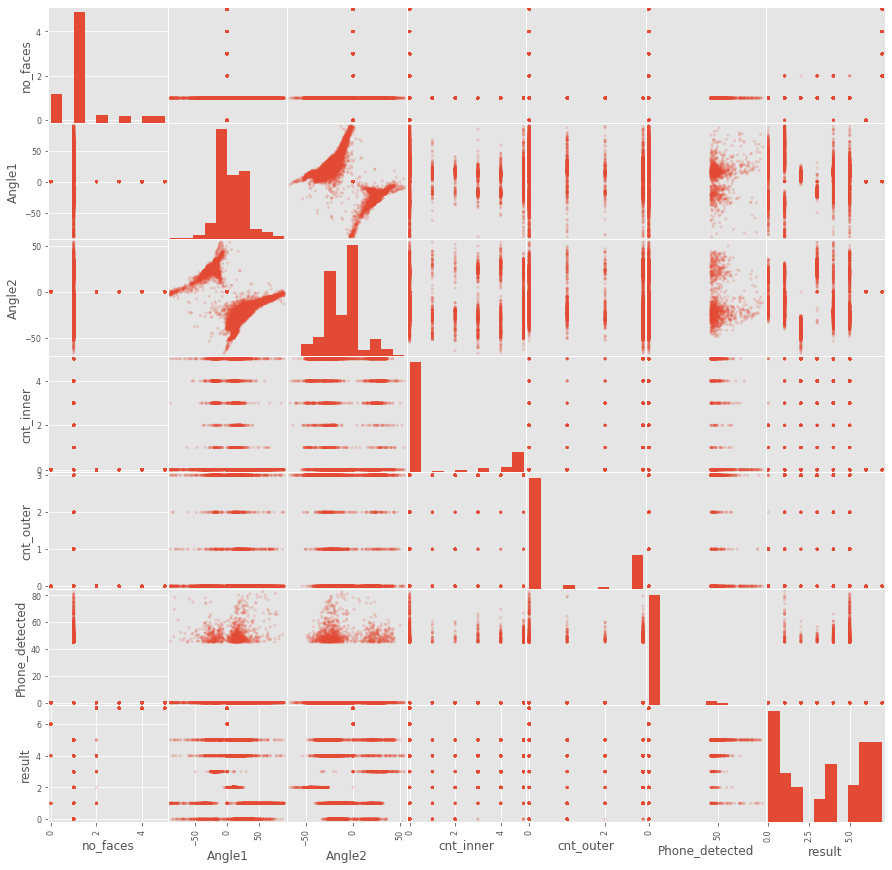

In [688]:
pd.plotting.scatter_matrix(df,alpha=0.2,figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001914E3A1A20>,
      dtype=object)

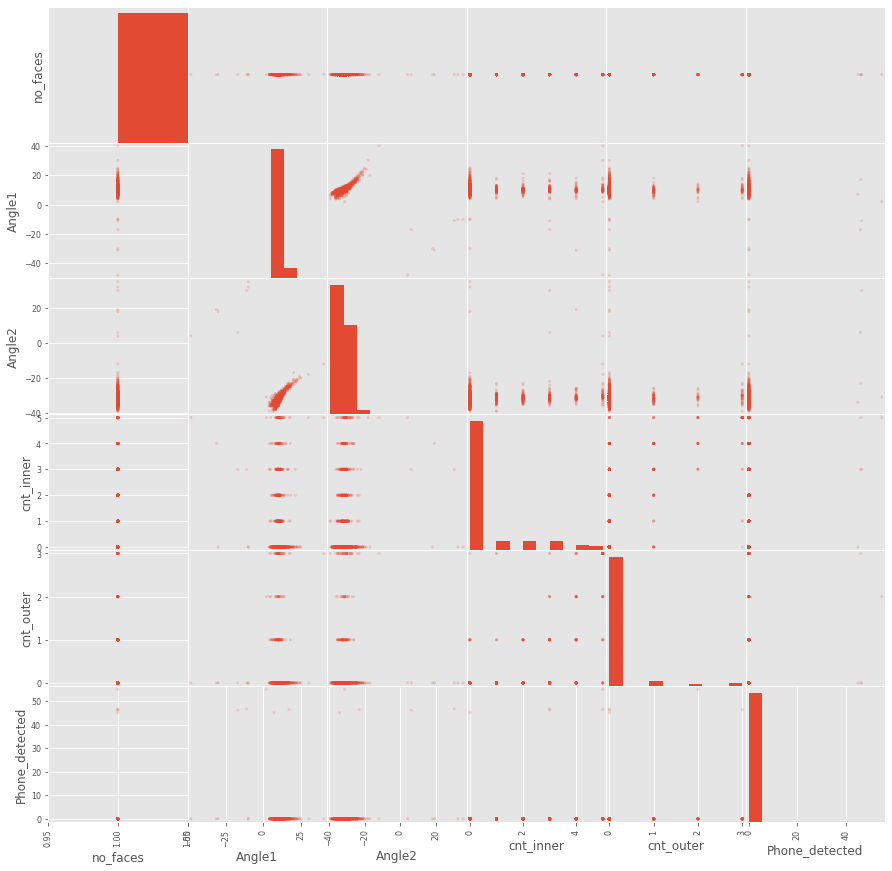

In [485]:
pd.plotting.scatter_matrix(ncheat_data,alpha=0.2,figsize=(15,15))

# fitting to model

In [689]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,Normalizer
from sklearn.model_selection import train_test_split

In [690]:
df[['Angle1','Angle2','cnt_inner','cnt_outer','Phone_detected']] = MinMaxScaler().fit_transform(df[['Angle1','Angle2','cnt_inner','cnt_outer','Phone_detected']])
# ncheat_data[['no_faces','Angle1','Angle2','cnt_inner','cnt_outer','Phone_detected']] = MinMaxScaler().fit_transform(ncheat_data[['no_faces','Angle1','Angle2','cnt_inner','cnt_outer','Phone_detected']])
# cheat_data[['no_faces','Angle1','Angle2','cnt_inner','cnt_outer','Phone_detected']] = Normalizer().fit_transform(cheat_data[['no_faces','Angle1','Angle2','cnt_inner','cnt_outer','Phone_detected']])
# ncheat_data[['no_faces','Angle1','Angle2','cnt_inner','cnt_outer','Phone_detected']] = Normalizer().fit_transform(ncheat_data[['no_faces','Angle1','Angle2','cnt_inner','cnt_outer','Phone_detected']])

In [488]:
# ncheat_data[['Head_orientation_vertical', 'Head_orientation_horizontal',
#        'Mouth_open', 'Phone_detected', 'Head_count', 'Head_angles_v',
#        'Head_angles_h']] = MinMaxScaler().fit_transform(ncheat_data[['Head_orientation_vertical', 'Head_orientation_horizontal',
#        'Mouth_open', 'Phone_detected', 'Head_count', 'Head_angles_v',
#        'Head_angles_h']])

In [652]:
cheat_data = cheat_data.assign(result=[1]*cheat_data.shape[0])
ncheat_data = ncheat_data.assign(result=[0]*ncheat_data.shape[0])

In [653]:
df = pd.concat([cheat_data,ncheat_data])

In [691]:
df = df.sample(frac=1).reset_index(drop=True) #shuffling

In [692]:
df.shape

(17779, 7)

In [693]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [694]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [695]:
X_train.shape

(12445, 6)

In [696]:
y_train.shape

(12445,)

# SVM

In [660]:
from sklearn import svm

In [697]:
model = svm.SVC(gamma="scale",probability=True)

In [698]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [699]:
y_pred = model.predict(X_test)

In [700]:
from sklearn import metrics

In [701]:
score = metrics.accuracy_score(y_test, y_pred)

In [702]:
import matplotlib.pyplot as plt
import seaborn as sns

In [703]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[1118,  103,    0,    0,   20,    0,    0,    0],
       [ 154,  311,    0,    1,   25,   27,    5,    3],
       [  22,    0,  340,    0,   25,    4,    0,    0],
       [   2,    6,    0,  230,    1,   16,    0,    8],
       [ 158,   15,   16,   20,  398,   24,    4,   17],
       [  90,   26,   13,   24,   56,  214,    0,    1],
       [   0,    0,    0,    0,    0,    0,  933,    0],
       [   0,    0,    0,    0,    0,    0,    0,  904]], dtype=int64)

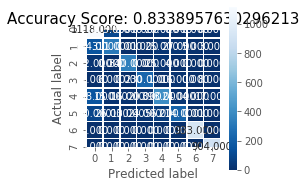

In [704]:
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Logistic Regression

In [505]:
from sklearn.linear_model import LogisticRegression

In [506]:
logistic_model = LogisticRegression()

In [507]:
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [508]:
y_pred = logistic_model.predict(X_test)

In [509]:
score = logistic_model.score(X_test,y_test)

In [510]:
score

0.844789356984479

In [511]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[512,  19],
       [121, 250]], dtype=int64)

In [512]:
import matplotlib.pyplot as plt
import seaborn as sns

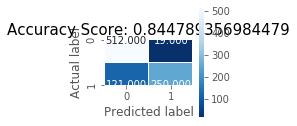

In [513]:
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Linear Regression

In [514]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)

In [515]:
linear_model.coef_

array([0.40104131, 0.21137489, 0.54962972, 2.84603226, 2.1510052 ,
       0.44345852])

In [516]:
linear_model.intercept_

0.5737632576734284

In [517]:
linear_model.score(X_train,y_train)

0.5277631766449068

# Decision Tree

In [518]:
from sklearn.tree import DecisionTreeClassifier

In [519]:
dtc = DecisionTreeClassifier(random_state=10)

In [520]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [521]:
y_pred = dtc.predict(X_test)

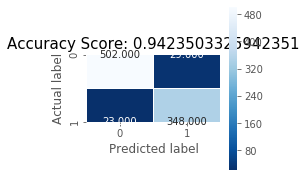

In [522]:
score = metrics.accuracy_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [466]:
dtc.predict(X_test)

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

# Testing other dataset

In [49]:
data = pd.read_csv('file.csv')

In [49]:
del data['Unnamed: 0']

In [50]:
data = data.replace(['Head up', 'Head down', 'Head left', 'Head right', 'Mouth open'], [1,-1,-1,1,1])

In [51]:
data.loc[:,:data.columns[3]] = data.loc[:,:data.columns[3]].replace(' ',0)

In [52]:
data[data.columns[3]] = data[data.columns[3]].astype('float64')

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [54]:
data[['Head_orientation_vertical', 'Head_orientation_horizontal',
       'Mouth_open', 'Phone_detected', 'Head_count', 'Head_angles_v',
       'Head_angles_h']] = MinMaxScaler().fit_transform(data[['Head_orientation_vertical', 'Head_orientation_horizontal',
       'Mouth_open', 'Phone_detected', 'Head_count', 'Head_angles_v',
       'Head_angles_h']])

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [55]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.25)

# Visualization

In [523]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

In [669]:
len(model.support_)

268

In [670]:
# conda install -c conda-forge mlxtend

In [671]:
# v = X_train.mean()
# filler_values = {}
# for i in range(6):
#     filler_values[i] = v[i]
# plot_decision_regions(X=X_train.values[1000:1200], 
#                       y=y_train.values[1000:1200],
#                       filler_feature_values=filler_values,
#                       clf=model, 
#                       legend=2)

# # Update plot object with X/Y axis labels and Figure Title
# plt.xlabel(X.columns[0], size=14)
# plt.ylabel(X.columns[1], size=14)
# plt.title('SVM Decision Region Boundary', size=16)
# plt.show()

In [672]:
# Get support vector indices
clf = model
support_vector_indices = clf.support_

In [673]:

# Get number of support vectors per class
support_vectors_per_class = clf.n_support_

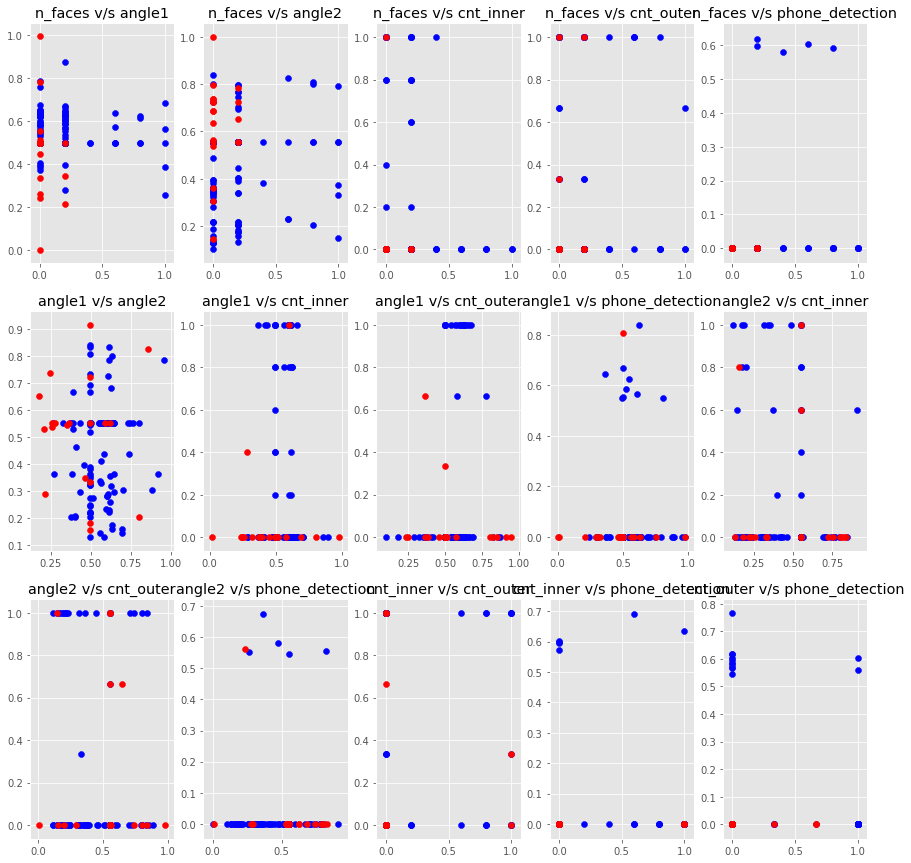

In [674]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

fig, axs = plt.subplots(3, 5,figsize=(15,15))
# Visualize support vectors
axs[0,0].scatter(np.random.choice(X_train.iloc[:,0],100), np.random.choice(X_train.iloc[:,1],100),color="blue")
axs[0,0].scatter(np.random.choice(support_vectors[:,0],20), np.random.choice(support_vectors[:,1],20), color='red')
axs[0,0].set_title('n_faces v/s angle1')

axs[0,1].scatter(np.random.choice(X_train.iloc[:,0],100), np.random.choice(X_train.iloc[:,2],100),color="blue")
axs[0,1].scatter(np.random.choice(support_vectors[:,0],20), np.random.choice(support_vectors[:,2],20), color='red')
axs[0,1].set_title('n_faces v/s angle2')

axs[0,2].scatter(np.random.choice(X_train.iloc[:,0],100), np.random.choice(X_train.iloc[:,3],100),color="blue")
axs[0,2].scatter(np.random.choice(support_vectors[:,0],20), np.random.choice(support_vectors[:,3],20), color='red')
axs[0,2].set_title('n_faces v/s cnt_inner')

axs[0,3].scatter(np.random.choice(X_train.iloc[:,0],100), np.random.choice(X_train.iloc[:,4],100),color="blue")
axs[0,3].scatter(np.random.choice(support_vectors[:,0],20), np.random.choice(support_vectors[:,4],20), color='red')
axs[0,3].set_title('n_faces v/s cnt_outer')

axs[0,4].scatter(np.random.choice(X_train.iloc[:,0],100), np.random.choice(X_train.iloc[:,5],100),color="blue")
axs[0,4].scatter(np.random.choice(support_vectors[:,0],20), np.random.choice(support_vectors[:,5],20), color='red')
axs[0,4].set_title('n_faces v/s phone_detection')

axs[1,0].scatter(np.random.choice(X_train.iloc[:,1],100), np.random.choice(X_train.iloc[:,2],100),color="blue")
axs[1,0].scatter(np.random.choice(support_vectors[:,1],20), np.random.choice(support_vectors[:,2],20), color='red')
axs[1,0].set_title('angle1 v/s angle2')

axs[1,1].scatter(np.random.choice(X_train.iloc[:,1],100), np.random.choice(X_train.iloc[:,3],100),color="blue")
axs[1,1].scatter(np.random.choice(support_vectors[:,1],20), np.random.choice(support_vectors[:,3],20), color='red')
axs[1,1].set_title('angle1 v/s cnt_inner')

axs[1,2].scatter(np.random.choice(X_train.iloc[:,1],100), np.random.choice(X_train.iloc[:,4],100),color="blue")
axs[1,2].scatter(np.random.choice(support_vectors[:,1],20), np.random.choice(support_vectors[:,4],20), color='red')
axs[1,2].set_title('angle1 v/s cnt_outer')

axs[1,3].scatter(np.random.choice(X_train.iloc[:,1],100), np.random.choice(X_train.iloc[:,5],100),color="blue")
axs[1,3].scatter(np.random.choice(support_vectors[:,1],20), np.random.choice(support_vectors[:,5],20), color='red')
axs[1,3].set_title('angle1 v/s phone_detection')

axs[1,4].scatter(np.random.choice(X_train.iloc[:,2],100), np.random.choice(X_train.iloc[:,3],100),color="blue")
axs[1,4].scatter(np.random.choice(support_vectors[:,2],20), np.random.choice(support_vectors[:,3],20), color='red')
axs[1,4].set_title('angle2 v/s cnt_inner')

axs[2,0].scatter(np.random.choice(X_train.iloc[:,2],100), np.random.choice(X_train.iloc[:,4],100),color="blue")
axs[2,0].scatter(np.random.choice(support_vectors[:,2],20), np.random.choice(support_vectors[:,4],20), color='red')
axs[2,0].set_title('angle2 v/s cnt_outer')

axs[2,1].scatter(np.random.choice(X_train.iloc[:,2],100), np.random.choice(X_train.iloc[:,5],100),color="blue")
axs[2,1].scatter(np.random.choice(support_vectors[:,2],20), np.random.choice(support_vectors[:,5],20), color='red')
axs[2,1].set_title('angle2 v/s phone_detection')

axs[2,2].scatter(np.random.choice(X_train.iloc[:,3],100), np.random.choice(X_train.iloc[:,4],100),color="blue")
axs[2,2].scatter(np.random.choice(support_vectors[:,3],20), np.random.choice(support_vectors[:,4],20), color='red')
axs[2,2].set_title('cnt_inner v/s cnt_outer')

axs[2,3].scatter(np.random.choice(X_train.iloc[:,3],100), np.random.choice(X_train.iloc[:,5],100),color="blue")
axs[2,3].scatter(np.random.choice(support_vectors[:,3],20), np.random.choice(support_vectors[:,5],20), color='red')
axs[2,3].set_title('cnt_inner v/s phone_detection')

axs[2,4].scatter(np.random.choice(X_train.iloc[:,4],100), np.random.choice(X_train.iloc[:,5],100),color="blue")
axs[2,4].scatter(np.random.choice(support_vectors[:,4],20), np.random.choice(support_vectors[:,5],20), color='red')
axs[2,4].set_title('cnt_outer v/s phone_detection')

# plt.title('Linearly separable data with support vectors')
# plt.xlabel('X1')
# plt.ylabel('X2')

plt.show()

In [675]:
v = clf.predict_proba(X_test)

In [676]:
v[clf.classes_]

array([[9.99933428e-01, 6.65715024e-05],
       [9.99922058e-01, 7.79420649e-05]])

In [532]:
v

array([[0.92212579, 0.07787421],
       [0.81275234, 0.18724766],
       [0.68065465, 0.31934535],
       ...,
       [0.94563381, 0.05436619],
       [0.03408995, 0.96591005],
       [0.94009265, 0.05990735]])

In [533]:
for i in range(6):
    print(clf.decision_function(X_test)[i].mean())

-1.1043154575348335
-0.6662395847048039
-0.3557885918045145
-1.291642577903774
0.9997152377419641
-0.9981520309050997


In [534]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(34)

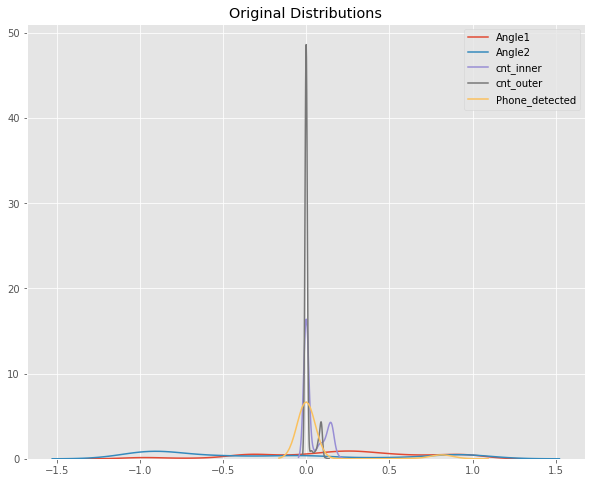

In [535]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

# sns.kdeplot(df['no_faces'], ax=ax1)
sns.kdeplot(cheat_data['Angle1'], ax=ax1)
sns.kdeplot(cheat_data['Angle2'], ax=ax1)
sns.kdeplot(cheat_data['cnt_inner'], ax=ax1)
sns.kdeplot(cheat_data['cnt_outer'], ax=ax1)
sns.kdeplot(cheat_data['Phone_detected'], ax=ax1)

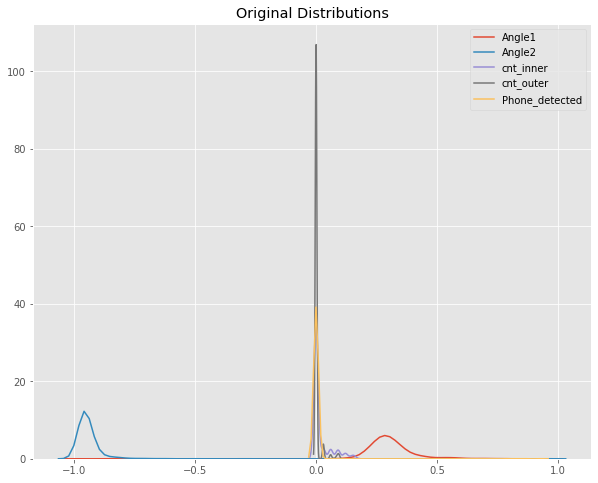

In [536]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

# sns.kdeplot(df['no_faces'], ax=ax1)
sns.kdeplot(ncheat_data['Angle1'], ax=ax1)
sns.kdeplot(ncheat_data['Angle2'], ax=ax1)
sns.kdeplot(ncheat_data['cnt_inner'], ax=ax1)
sns.kdeplot(ncheat_data['cnt_outer'], ax=ax1)
sns.kdeplot(ncheat_data['Phone_detected'], ax=ax1)

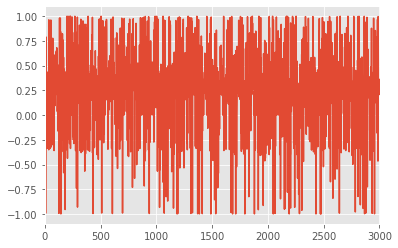

In [537]:
df['Angle1'].plot()

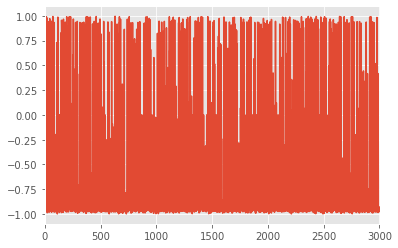

In [538]:
df['Angle2'].plot()

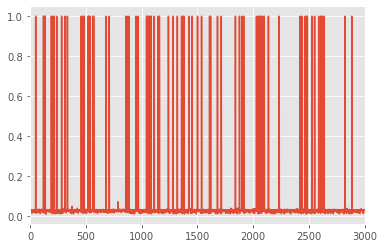

In [539]:
df['no_faces'].plot()

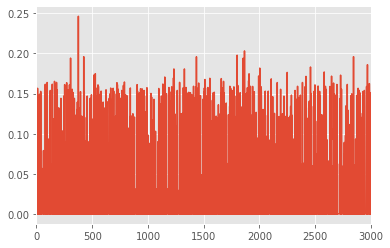

In [540]:
df['cnt_inner'].plot()

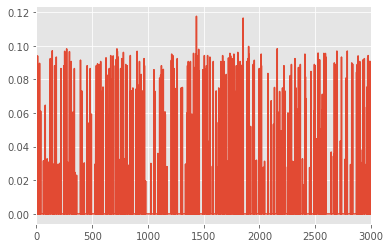

In [541]:
df['cnt_outer'].plot()

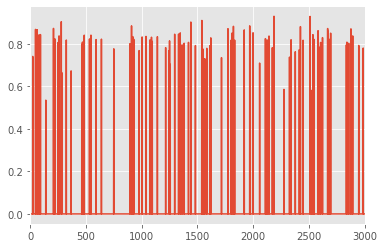

In [542]:
df['Phone_detected'].plot()

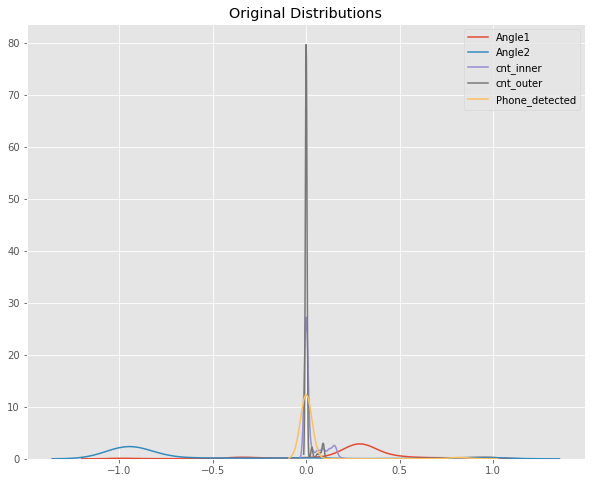

In [543]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['Angle1'], ax=ax1)
sns.kdeplot(df['Angle2'], ax=ax1)
sns.kdeplot(df['cnt_inner'], ax=ax1)
sns.kdeplot(df['cnt_outer'], ax=ax1)
sns.kdeplot(df['Phone_detected'], ax=ax1)